### Data
Unemployment <br>
Dataset ID `90432312-35be-46c4-bd79-42f606d5611e` <br>

In [1]:
import numpy as np
import vega
import json
from vega import Vega

### Template specification - unvetted
(for WPS Global Tool backoffice; cannot be created directly)

In [ ]:
{
  "width": 300,
  "height": 300,
  "autosize": {
    "contains": "padding",
    "resize": true,
    "type": "pad"
  },
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "update": "datum",
          "events": "@cell:mouseover"
        },
        {
          "update": "null",
          "events": "@cell:mouseout"
        }
      ]
    }
  ],
  "data": [
    {
      "name": "widget_datapoints",
      "urlTemplate": "api/v1/widget_datapoints/${region.gid_2}/SL.UEM.TOTL.ZS/",
      "format": {
        "property": "widget_datapoints",
        "type": "json",
        "parse": {
          "month_indep": "date:'%Y-%m-%d'"
        }
      }
    },
    {
      "name": "dots",
      "source": "widget_datapoints",
      "transform": [
        {
          "expr": "hover && hover.datum.year === datum.year",
          "type": "filter"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "year",
      "type": "linear",
      "range": "width",
      "zero": false,
      "nice": false,
      "domain": {
        "data": "widget_datapoints",
        "field": "year"
      }
    },
    {
      "name": "month_indep",
      "type": "time",
      "range": "width",
      "domain": {
        "data": "widget_datapoints",
        "field": "month_indep"
      }
    },
    {
      "name": "SL.UEM.TOTL.ZS",
      "type": "linear",
      "range": "height",
      "zero": true,
      "nice": true,
      "domain": {
        "data": "widget_datapoints",
        "field": "SL\\.UEM\\.TOTL\\.ZS"
      }
    }
  ],
  "axes": [
    {
      "labelOverlap": "parity",
      "scale": "year",
      "format": "4f",
      "zindex": 1,
      "orient": "bottom"
    },
    {
      "title": "Unemployment (% of total labor force)",
      "scale": "SL.UEM.TOTL.ZS",
      "labelOverlap": "parity",
      "format": "2s",
      "grid": true,
      "zindex": 0,
      "orient": "left"
    }
  ],
  "marks": [
    {
      "name": "lines",
      "interactive": false,
      "type": "line",
      "encode": {
        "enter": {
          "y": {
            "field": "SL\\.UEM\\.TOTL\\.ZS",
            "scale": "SL.UEM.TOTL.ZS"
          },
          "x": {
            "field": "year",
            "scale": "year"
          }
        }
      },
      "from": {
        "data": "widget_datapoints"
      }
    },
    {
      "name": "points",
      "type": "symbol",
      "interactive": false,
      "encode": {
        "update": {
          "opacity": {
            "value": 1
          }
        },
        "enter": {
          "y": {
            "field": "SL\\.UEM\\.TOTL\\.ZS",
            "scale": "SL.UEM.TOTL.ZS"
          },
          "x": {
            "field": "year",
            "scale": "year"
          }
        }
      },
      "from": {
        "data": "dots"
      }
    },
    {
      "name": "cell",
      "type": "path",
      "encode": {
        "update": {
          "opacity": {
            "value": 0
          },
          "path": {
            "field": "path"
          },
          "fill": {
            "value": "red"
          }
        },
        "hover": {
          "tooltip": {
            "signal": "{'Unemployment (% of total labor force)': format(hover.datum['SL\\.UEM\\.TOTL\\.ZS'], '.3s'), 'Year': hover.datum.year}"
          }
        }
      },
      "transform": [
        {
          "size": [
            {
              "signal": "width"
            },
            {
              "signal": "height"
            }
          ],
          "y": "datum.y",
          "x": "datum.x",
          "type": "voronoi"
        }
      ],
      "from": {
        "data": "lines"
      }
    }
  ]
}

### Stand-alone specification
(eg for use with https://vega.github.io/editor/#/)

Preview region `EGY.14.3_1` <br>
url `` <br>

Note: in this instance, problems with character encoding due to lots of double escapes ("\\")

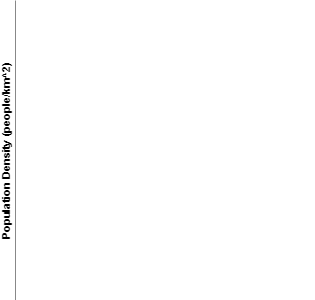

In [2]:
specV5=json.loads("""

""")
vega5view=dict(specV5)
Vega(vega5view)